# Tomato Leaf Disease Detection Project

# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, optimizers, models
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/PlantVillage.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/Tomato leaves Dataset")
zip_ref.close()

# Load Data

In [5]:
data_path="/content/drive/MyDrive/Tomato Dataset"

In [6]:
train_data_path=os.path.join(data_path, 'Train Data')
val_data_path=os.path.join(data_path, 'Validation Data')
test_data_path=os.path.join(data_path, "Test Data")

In [7]:
names=os.listdir(train_data_path)
names

['Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

In [8]:
def total_img(path,names):
    count=0
    for name in names:
        size=len(os.listdir(os.path.join(path, name)))
        count+=size
    return count

In [9]:
print("Total Training Images: ", total_img(train_data_path, names))
print("Total Validation Images: ", total_img(val_data_path, names))
print("Total Test Images: ", total_img(test_data_path, names))

Total Training Images:  12177
Total Validation Images:  3198
Total Test Images:  637


# Data preprocessing

# Using ImageDataGenerator to read images from directories

In [10]:
datagenerator=ImageDataGenerator(
                             rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [11]:
train_gen= datagenerator.flow_from_directory(
                                              train_data_path,
                                              batch_size=50,
                                              target_size=(160,160),
                                              class_mode='categorical'
                                            )

Found 12176 images belonging to 10 classes.


In [12]:
val_gen= datagenerator.flow_from_directory(
                                            val_data_path,
                                            target_size=(160,160),
                                            batch_size=30,
                                            class_mode='categorical'
                                        )

Found 3198 images belonging to 10 classes.


In [13]:
labels=train_gen.class_indices
labels

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

# Network Architecture

In [20]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3) , activation='relu', input_shape=(160,160,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),  activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [22]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_acc") is not None and logs.get('val_acc')>=0.97:
            print("\n Reached 97 validation accuracy so cancelling training")
            self.model.stop_training=True

callbacks=mycallback()

# Training

In [24]:
history=model.fit(train_gen, epochs=80, validation_data=val_gen, callbacks=[callbacks])

Epoch 1/80
244/244 [==============================] - 5669s 23s/step - loss: 1.8166 - acc: 0.3408 - val_loss: 1.4535 - val_acc: 0.4531
Epoch 2/80
244/244 [==============================] - 149s 611ms/step - loss: 1.2308 - acc: 0.5724 - val_loss: 0.9299 - val_acc: 0.6723
Epoch 3/80
244/244 [==============================] - 149s 611ms/step - loss: 0.9374 - acc: 0.6781 - val_loss: 0.7791 - val_acc: 0.7342
Epoch 4/80
244/244 [==============================] - 150s 617ms/step - loss: 0.7557 - acc: 0.7355 - val_loss: 0.7698 - val_acc: 0.7389
Epoch 5/80
244/244 [==============================] - 147s 603ms/step - loss: 0.6161 - acc: 0.7838 - val_loss: 0.4820 - val_acc: 0.8371
Epoch 6/80
244/244 [==============================] - 150s 616ms/step - loss: 0.5567 - acc: 0.8051 - val_loss: 0.4126 - val_acc: 0.8621
Epoch 7/80
244/244 [==============================] - 159s 653ms/step - loss: 0.5255 - acc: 0.8153 - val_loss: 0.4497 - val_acc: 0.8430
Epoch 8/80
244/244 [=============================

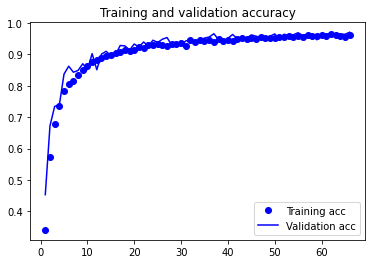

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

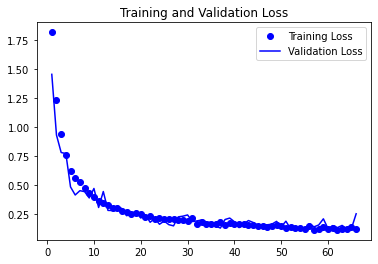

In [26]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss" )
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [32]:
model.save("/content/drive/MyDrive/Tomato Disease Detection augmented model new.h5")

In [28]:
testdatagen=ImageDataGenerator(rescale=1./255)

In [29]:
test_generator=testdatagen.flow_from_directory(
                                            test_data_path,
                                            batch_size=10,
                                            target_size=(160,160),
                                            class_mode='categorical'
                                            )

Found 637 images belonging to 10 classes.


In [30]:
loss,acc= model.evaluate(test_generator)

64/64 [==============================] - 200s 3s/step - loss: 0.0669 - acc: 0.9796


In [31]:
print("Test Data Loss: ",loss)
print("Test Data Accuracy: ",acc)

Test Data Loss:  0.06690479069948196
Test Data Accuracy:  0.9795918464660645
